# <font style="color:rgb(50, 120, 229);"> Auto MPG Dataset </font>

En este cuaderno, estaremos trabajando con el conjunto de datos Auto MPG del repositorio de aprendizaje automático de UC Irvine aquí.

Este conjunto de datos contiene casi 400 muestras de datos de automóviles de la década de 1970. Hay ocho campos de datos en el conjunto de datos que consisten en varios atributos como el peso del vehículo y la potencia, y el objetivo es utilizar estas características para predecir el consumo de combustible del vehículo.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["figure.figsize"] = (15, 8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

## <font style="color:rgb(50, 120, 229);"> 1. Cargar los datos </font>

Los datos se encuentran en formato CSV, por lo que podemos cargarlos fácilmente utilizando la biblioteca pandas.

In [2]:
data = pd.read_csv('./data/auto-mpg.csv')
data = data[["MPG", "Displacement", "Horsepower"]]
data.head()

,MPG,Displacement,Horsepower
0,18.0,307.0,130.0
1,15.0,350.0,165.0
2,18.0,318.0,150.0
3,16.0,304.0,150.0
4,17.0,302.0,140.0


## <font style="color:rgb(50, 120, 229);"> 2. Limpieza de datos </font>

La mayoría de los conjuntos de datos requieren algún nivel de preprocesamiento, a menudo denominado "limpieza".

Por ejemplo, algunos campos pueden faltar en campos numéricos etiquetados en el conjunto de datos con varios marcadores ('?', 'N/A', 'NaN', etc.). Para verificar esta condición, podemos usar el siguiente comando.

<font style="color:rgb(8, 133, 37);">**Sintaxis:**</font>

```python
df.isna().sum()
```

Esto nos dará una lista de todas las columnas y la cantidad de valores faltantes en cada una de ellas.

In [3]:
#TODO: Muestra el número de datos faltantes en cada columna
data.isna().sum()

,0
MPG,0
Displacement,0
Horsepower,6


Puedes observar que tenemos 6 valores faltantes en la columna 'horsepower'.

Existen diferentes estrategias para manejar los valores faltantes, en este ejercicio eliminaremos las filas que contienen valores faltantes.

<font style="color:rgb(8, 133, 37);">**Sintaxis:**</font>

```python
df = df.dropna()
```


In [4]:
#TODO: Elimina las filas con datos faltantes
data = data.dropna()

#TODO: Muestra el número de datos faltantes en cada columna
data.isna().sum()

,0
MPG,0
Displacement,0
Horsepower,0


## <font style="color:rgb(50, 120, 229);"> 3. Análisis exploratorio de datos </font>

El análisis exploratorio de datos es una parte importante de cualquier proyecto de aprendizaje automático. Nos ayuda a comprender mejor los datos y a identificar patrones y relaciones entre las diferentes características. Esto queda fuera del alcance de este cuaderno.

## <font style="color:rgb(50, 120, 229);"> 4. Revisar las estadísticas de los datos </font>

Podemos usar el método `describe()` para obtener un resumen de las estadísticas de los datos.

<font style="color:rgb(8, 133, 37);">**Sintaxis:**</font>

```python
df.describe()
```

In [5]:
#TODO: Muestra las estadísticas básicas de las columnas numéricas
data.describe()

,MPG,Displacement,Horsepower
count,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388
std,7.805007,104.644004,38.491160
min,9.000000,68.000000,46.000000
25%,17.000000,105.000000,75.000000
50%,22.750000,151.000000,93.500000
75%,29.000000,275.750000,126.000000
max,46.600000,455.000000,230.000000


Como puedes ver en la tabla, las diversas características tienen un amplio rango de valores que abarcan tres órdenes de magnitud. Cuando los datos de las características varían tan ampliamente, generalmente se recomienda escalar los datos de las características como un paso de preprocesamiento antes de entrenar un modelo.

## <font style="color:rgb(50, 120, 229);"> 5. Dividir los datos en conjuntos de entrenamiento y prueba </font>

Ahora vamos a dividir el conjunto de datos en componentes de prueba y entrenamiento, lo cual es necesario para entrenar y probar adecuadamente los modelos.

<font style="color:rgb(8, 133, 37);">**Sintaxis:**</font>

```python
train_df = df.sample(frac=0.8, random_state=0)
test_df = df.drop(train_df.index)
```

**Parámetros:**

- `frac`: Fracción de los datos que se utilizarán para el conjunto de entrenamiento.
- `random_state`: Semilla para la generación de números aleatorios. (Se utiliza para reproducir los mismos resultados).


In [6]:
#TODO: Separa los datos en entrenamiento y prueba
train_df = data.sample(frac=0.8, random_state=0)
test_df = data.drop(train_df.index)

## <font style="color:rgb(50, 120, 229);"> 6. Separar las características y las etiquetas </font>

Dado que las características y el valor objetivo están contenidos en el mismo marco de datos, los separaremos en dos marcos de datos para mantenerlos aislados. Esto también facilita la gestión de los datos.

<font style="color:rgb(8, 133, 37);">**Sintaxis:**</font>

```python
train_features = train_df.copy() # Copiar todas las columnas
test_features = test_df.copy()
```

```python
train_labels = train_features.pop('mpg') # Eliminar la columna 'mpg' de train_features y almacenarla en train_labels
test_labels = test_features.pop('mpg')
```

In [8]:
#TODO: Crea una copia de los datos de entrenamiento y prueba
train_features = train_df.copy()
test_features = test_df.copy()

#TODO: Separa las etiquetas de los datos
train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

<font style="color:rgb(8, 133, 37);">**Convertir a numpy array:**</font>

Keras espera que los datos de entrada sean matrices numpy, por lo que necesitamos convertir los datos de entrenamiento y prueba en matrices numpy.

```python
X_train = train_features.values
X_test = test_features.values

y_train = train_labels.values
y_test = test_labels.values
```

In [9]:
#TODO: Convierte los datos a arreglos de numpy
X_train = train_features.values
X_test = test_features.values

y_train = train_labels.values
y_test = test_labels.values

## <font style="color:rgb(50, 120, 229);"> 6. Normalización de datos </font>

Como se mencionó anteriormente, este conjunto de datos contiene una amplia gama de valores de características, y a menudo se recomienda escalar las características para que abarquen un rango de valores similar.

Una razón por la que esto es importante es que las características se multiplican por los pesos del modelo. Por lo tanto, la escala de las salidas y la escala de los gradientes se ven afectadas por la escala de las entradas.

Aunque un modelo podría converger sin escalar las características, el escalado de las características hace que el entrenamiento sea mucho más estable y también facilita el proceso de optimización al permitir que el descenso de gradiente converja mucho más rápido.


<font style="color:rgb(50, 120, 229);">**Estándarización**</font>

La estandarización (también conocida como escalado de puntuación z) asume que los datos originales están distribuidos de forma normal y escala la característica para que tenga una media de cero y una desviación estándar de 1.

Esto se logra para cada característica (xi) restando la media de los datos de la característica a cada punto de datos (conocido como sustracción de la media) y luego dividiendo ese resultado por la desviación estándar de los datos de la característica, como se muestra a continuación:

$$
x_i = \frac{x_i - \text{mean}(x)}{\text{std}(x)}
$$

<font style="color:rgb(196, 30, 58);">**NOTA**</font>

Los parámetros de normalización (media y desviación estándar) se derivan solo del conjunto de datos de entrenamiento, pero se aplicarán a todos los datos (entrenamiento, validación y prueba).


In [11]:
#TODO: Normaliza los datos de entrenamiento y prueba creando una capa de Normalización
#Se utiliza train_features para normalizar
# Importa la libreria de TensorFlow
import tensorflow as tf
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_train)

## <font style="color:rgb(50, 120, 229);"> 7. Construir el modelo </font>

### <font style="color:rgb(50, 120, 229);"> 7.1. Definir el modelo </font>

<center>
    <img src="https://github.com/sofiapapadron/IME_IAA/blob/main/Teoria/2_Clasificacion_imagenes_Keras/1_Fundamentos_Keras/apps/images/auto-model.webp?raw=1" width=600/>
</center>

In [12]:
#TODO: Define un modelo con dos capas ocultas con 32 neuronas y su capa de salida
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
    normalizer,
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

### <font style="color:rgb(50, 120, 229);"> 7.2. Definir la función de pérdida y el optimizador </font>

Utilizaremos la función de pérdida de error cuadrático medio (mse) y el optimizador SDG.

In [13]:
#TODO: Compila el modelo con la función de pérdida y el optimizador adecuado
model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=0.001))

### <font style="color:rgb(50, 120, 229);"> 7.3. Entrenar el modelo </font>

Ahora es el momento de entrenar el modelo usando la única característica de entrada.

Para este conjunto de datos y los ejemplos en este cuaderno, usaremos 100 épocas.

Especifica un `validación_split` del 30% (0.3), para reservar el 30% de las muestras de entrenamiento para no ser utilizadas para entrenar el modelo, de modo que puedan ser utilizadas para evaluar el modelo durante el proceso de entrenamiento.

**Más adelante entenderemos por que esto es importante**

In [14]:
#TODO: Utiliza el método fit para entrenar el modelo, guarda el historial del entrenamiento en la variable history
history = model.fit(X_train, y_train, epochs=100, validation_split=0.3)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 623.2808 - val_loss: 571.6428
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 550.3447 - val_loss: 519.1266
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 508.0880 - val_loss: 395.3152
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 337.5830 - val_loss: 138.4328
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 102.9115 - val_loss: 35.2961
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 36.1858 - val_loss: 27.3146
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 26.0902 - val_loss: 24.4285
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 20.4355 - val_loss: 23.0824
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 19.3951 - val_loss: 22.3632
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 22.4457 - val_loss: 21.9649
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 22.4848 - val_loss: 21.6250
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14m

Durante este entrenamiento guardaremos dos historiales:

- La pérdida de entrenamiento en cada época.
- La pérdida de validación en cada época. (Después de ajustar los pesos del modelo, evaluamos el modelo en el conjunto de validación para ver cómo se desempeña en datos no vistos).

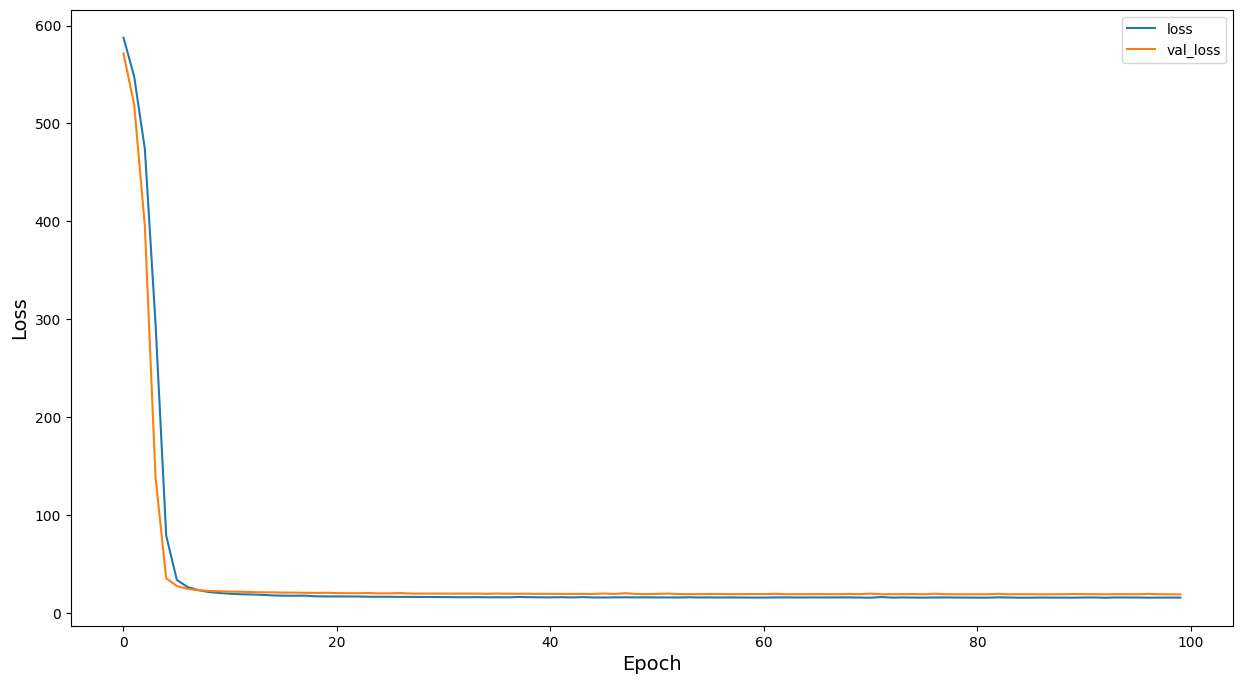

In [15]:
#TODO: Grafica la pérdida en función del número de épocas
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

### <font style="color:rgb(50, 120, 229);"> 7.4. Evaluar el modelo </font>

Finalmente, evaluaremos el modelo en el conjunto de prueba y veremos cómo se desempeña en datos no vistos.

Para evaluar el modelo, utilizaremos la función `evaluate()` que devolverá la pérdida y las métricas del modelo.

```python
model.evaluate(X_test, y_test)
```

In [16]:
#TODO: Evalúa el modelo con los datos de prueba
model.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.1319


12.299006462097168

### <font style="color:rgb(50, 120, 229);"> 7.4. Visualizar resultados </font>

Ejecuta las siguientes celdas para visualizar los resultados.

In [17]:
hp_min = train_features.Horsepower.min()
hp_max = train_features.Horsepower.max()
dp_min = train_features.Displacement.min()
dp_max = train_features.Displacement.max()

x_surf, y_surf = np.meshgrid(np.linspace(hp_min, hp_max, 100), np.linspace(dp_min, dp_max, 100))
x_grid = pd.DataFrame({'Horsepower': x_surf.ravel(), 'Displacement': y_surf.ravel()})

pred_y = model.predict(x_grid)
pred_y = np.array(pred_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


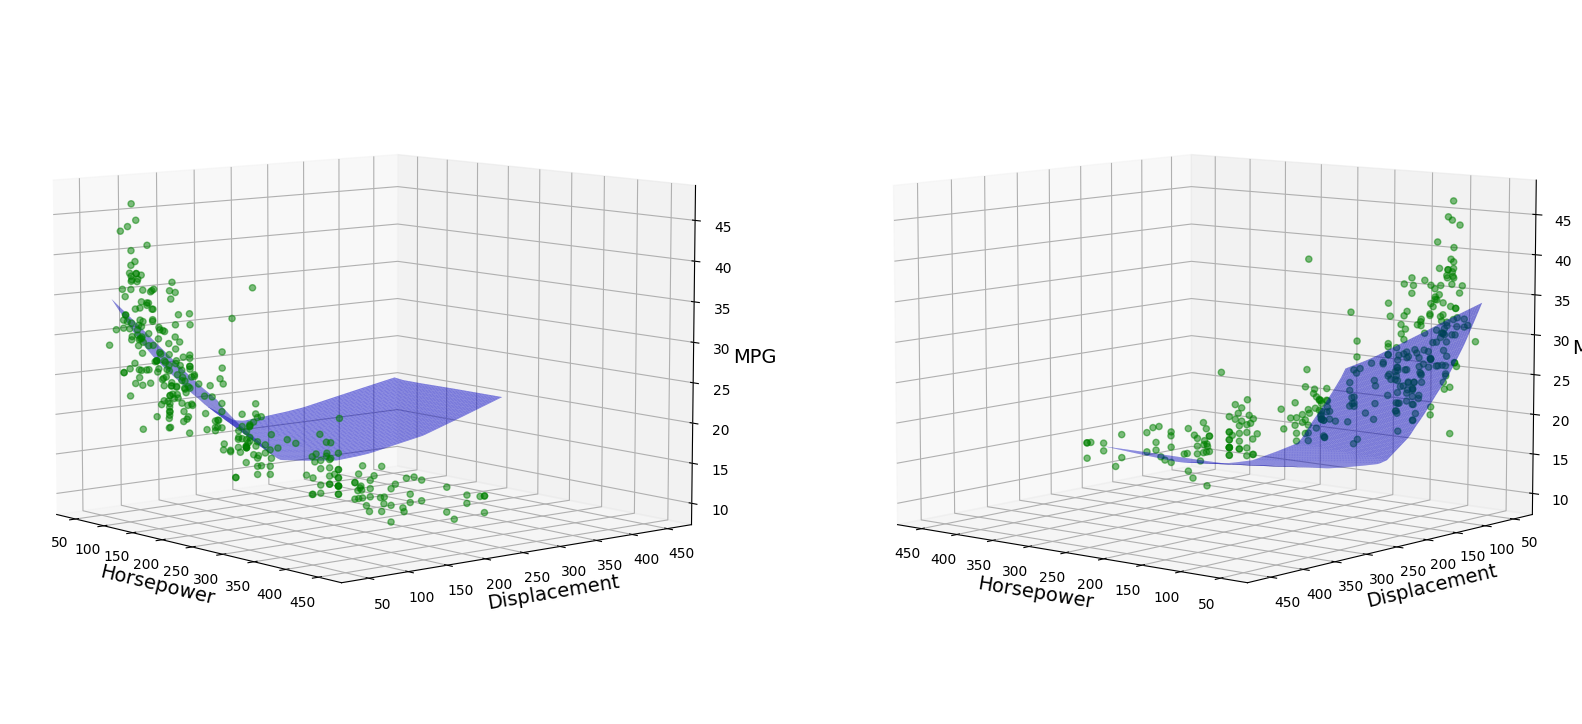

In [18]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='green',  marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, pred_y.reshape(x_surf.shape), color='blue', alpha=0.5)
ax.set_xlabel('Horsepower')
ax.set_ylabel('Displacement')
ax.set_zlabel('MPG')
ax.view_init(8, -40)

ax = fig.add_subplot(122, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c='green',  marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, pred_y.reshape(x_surf.shape), color='blue', alpha=0.5)
ax.set_xlabel('Horsepower')
ax.set_ylabel('Displacement')
ax.set_zlabel('MPG')
ax.view_init(8, 130)